<a href="https://colab.research.google.com/github/HarshavardhanBhupathi/Data-science/blob/main/Default_of_credit_card_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample ##downsizing the data
from sklearn.preprocessing import scale ## scaling and center the data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV ##cross validation
from sklearn.metrics import confusion_matrix ##creates confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA ##performs PCA to plot data

In [ ]:
cd=pd.read_excel('/home/default_of_credit_card_clients.xls',header=1)
cd.head()
x=cd.copy()

In [ ]:
cd.shape

(30000, 25)

In [ ]:
cd.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
cd.rename({'default payment next month': 'Default'},axis=1,inplace=True)

In [ ]:
cd.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
cd=cd.drop('ID',axis=1)

In [ ]:
cd.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [ ]:
cd.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Default          2
dtype: int64

In [ ]:
cd['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
cd['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
##'0' represents missing data

In [ ]:
len(cd.loc[(cd['MARRIAGE']==0) |(cd['EDUCATION']==0)])

68

In [ ]:
k=cd.loc[(cd['MARRIAGE']==0) |(cd['EDUCATION']==0)]
print(k)

       LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT5  PAY_AMT6  Default
218       110000    2          3  ...      3000      8954        0
809       160000    2          2  ...      1098       426        0
820       200000    2          3  ...       390       390        0
1019      180000    2          3  ...         0         0        0
1443      200000    1          3  ...      4430      6398        0
...          ...  ...        ...  ...       ...       ...      ...
28602     200000    2          3  ...      5716         0        0
28603     110000    2          3  ...      1800      1800        1
28766      80000    2          3  ...      5889      4239        0
29078     100000    2          3  ...      2400         0        0
29111     300000    2          3  ...         0         0        0

[68 rows x 24 columns]


In [ ]:
cd.shape

(30000, 24)

68 rows of 30000 contains missing values so its doesnt effect the data to build support vector machine. so drop the rows

In [ ]:
cd=cd.drop(k.index,axis=0)

In [ ]:
cd.shape

(29932, 24)

29932 rows is still too large for a support vector machine.lets downsize the data using resample from sklearn.utils 

In [ ]:
def0=cd[cd['Default']==0]
def1=cd[cd['Default']==1]

downsampling the def0 data

In [ ]:
def0_ds=resample(def0,replace=False,n_samples=1010,random_state=50)
def0_ds

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
2593,90000,2,6,2,49,-1,-1,-2,-2,-2,-2,1722,0,0,0,0,0,0,0,0,0,0,11135,0
29262,10000,1,3,2,24,0,0,0,0,0,0,2736,4050,5426,6743,8544,9858,3000,2000,2000,2000,2000,1000,0
16144,220000,2,2,2,36,0,0,0,0,0,0,124418,126695,106534,109884,106114,108202,6300,4000,5500,3775,4100,5000,0
7254,60000,1,3,3,43,0,0,0,0,0,0,70367,66657,63553,59633,55689,52778,2415,3000,2125,2007,3000,1758,0
28593,50000,2,1,1,45,-1,-1,-1,-1,-1,-1,7963,1664,5408,2734,7976,0,1669,5413,2734,7976,0,7000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,170000,1,3,1,45,0,0,0,0,0,0,40441,40937,34090,34894,36829,37727,5000,2000,2000,3000,2000,2000,0
6325,50000,1,3,1,51,-1,-1,0,0,0,0,636,2228,3287,4843,6379,6878,4600,1500,2000,2000,1000,3000,0
7625,20000,2,3,3,48,0,0,0,0,0,0,19590,19120,18932,18749,18620,18668,1308,1593,800,700,741,531,0
9827,200000,2,3,2,54,-2,-2,-2,-2,-2,-2,880,1948,3635,1186,0,0,1948,3635,1362,0,0,0,0


In [ ]:
def1_ds=resample(def1,replace=False,n_samples=1010,random_state=50)

In [ ]:
def1_ds

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
423,200000,1,2,1,38,2,2,2,0,0,0,104978,105924,102663,97090,98045,105253,4500,0,3500,3500,9000,0,1
16138,30000,2,3,2,33,0,0,2,0,0,2,22463,25362,24672,25317,26516,26133,3278,0,1233,1432,0,566,1
6942,20000,1,2,2,27,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
5501,290000,2,2,1,55,1,-2,-1,-1,-1,2,0,166,2462,-150,1134,777,166,2462,150,1833,0,500,1
16219,180000,2,1,2,44,0,0,2,0,0,0,7668,10006,7996,8960,6310,4656,2489,0,1166,126,112,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,20000,1,2,2,34,0,0,0,0,0,0,18351,17706,18831,18334,17280,15582,1304,1429,1608,346,312,318,1
426,20000,2,3,2,49,2,2,2,2,0,0,9551,12081,13087,12583,15327,16414,3000,1500,0,3123,1500,1000,1
8788,20000,2,2,1,24,2,0,0,0,0,0,17597,18629,19318,19434,19571,19792,1619,1308,688,706,806,595,1
19996,60000,2,2,1,37,0,0,0,0,0,0,59462,60866,54007,52089,29397,29110,3000,2570,2202,1200,1100,1100,1


In [ ]:
downsizeddata=pd.concat([def0_ds,def1_ds])

In [ ]:
downsizeddata

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
2593,90000,2,6,2,49,-1,-1,-2,-2,-2,-2,1722,0,0,0,0,0,0,0,0,0,0,11135,0
29262,10000,1,3,2,24,0,0,0,0,0,0,2736,4050,5426,6743,8544,9858,3000,2000,2000,2000,2000,1000,0
16144,220000,2,2,2,36,0,0,0,0,0,0,124418,126695,106534,109884,106114,108202,6300,4000,5500,3775,4100,5000,0
7254,60000,1,3,3,43,0,0,0,0,0,0,70367,66657,63553,59633,55689,52778,2415,3000,2125,2007,3000,1758,0
28593,50000,2,1,1,45,-1,-1,-1,-1,-1,-1,7963,1664,5408,2734,7976,0,1669,5413,2734,7976,0,7000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,20000,1,2,2,34,0,0,0,0,0,0,18351,17706,18831,18334,17280,15582,1304,1429,1608,346,312,318,1
426,20000,2,3,2,49,2,2,2,2,0,0,9551,12081,13087,12583,15327,16414,3000,1500,0,3123,1500,1000,1
8788,20000,2,2,1,24,2,0,0,0,0,0,17597,18629,19318,19434,19571,19792,1619,1308,688,706,806,595,1
19996,60000,2,2,1,37,0,0,0,0,0,0,59462,60866,54007,52089,29397,29110,3000,2570,2202,1200,1100,1100,1


In [ ]:
train=downsizeddata.drop('Default',axis=1)
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2593,90000,2,6,2,49,-1,-1,-2,-2,-2,-2,1722,0,0,0,0,0,0,0,0,0,0,11135
29262,10000,1,3,2,24,0,0,0,0,0,0,2736,4050,5426,6743,8544,9858,3000,2000,2000,2000,2000,1000
16144,220000,2,2,2,36,0,0,0,0,0,0,124418,126695,106534,109884,106114,108202,6300,4000,5500,3775,4100,5000
7254,60000,1,3,3,43,0,0,0,0,0,0,70367,66657,63553,59633,55689,52778,2415,3000,2125,2007,3000,1758
28593,50000,2,1,1,45,-1,-1,-1,-1,-1,-1,7963,1664,5408,2734,7976,0,1669,5413,2734,7976,0,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,20000,1,2,2,34,0,0,0,0,0,0,18351,17706,18831,18334,17280,15582,1304,1429,1608,346,312,318
426,20000,2,3,2,49,2,2,2,2,0,0,9551,12081,13087,12583,15327,16414,3000,1500,0,3123,1500,1000
8788,20000,2,2,1,24,2,0,0,0,0,0,17597,18629,19318,19434,19571,19792,1619,1308,688,706,806,595
19996,60000,2,2,1,37,0,0,0,0,0,0,59462,60866,54007,52089,29397,29110,3000,2570,2202,1200,1100,1100


In [ ]:
test=downsizeddata['Default'].copy()

In [ ]:
test

2593     0
29262    0
16144    0
7254     0
28593    0
        ..
15516    1
426      1
8788     1
19996    1
9640     1
Name: Default, Length: 2020, dtype: int64

##one hot encoding for categorical data . SVM natively support continous data not categorical data.so use one hot encoding to look it like a continous data

Two approaches to one hot encoding 
1) ColumnnTransformer From sci-kit learn
2) pandas'get_dummies()

In [ ]:
one_hot=pd.get_dummies(train,columns=['SEX','MARRIAGE','EDUCATION','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [ ]:
one_hot

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,...,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
2593,90000,49,1722,0,0,0,0,0,0,0,0,0,0,11135,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
29262,10000,24,2736,4050,5426,6743,8544,9858,3000,2000,2000,2000,2000,1000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16144,220000,36,124418,126695,106534,109884,106114,108202,6300,4000,5500,3775,4100,5000,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7254,60000,43,70367,66657,63553,59633,55689,52778,2415,3000,2125,2007,3000,1758,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28593,50000,45,7963,1664,5408,2734,7976,0,1669,5413,2734,7976,0,7000,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,20000,34,18351,17706,18831,18334,17280,15582,1304,1429,1608,346,312,318,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,20000,49,9551,12081,13087,12583,15327,16414,3000,1500,0,3123,1500,1000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8788,20000,24,17597,18629,19318,19434,19571,19792,1619,1308,688,706,806,595,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19996,60000,37,59462,60866,54007,52089,29397,29110,3000,2570,2202,1200,1100,1100,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
## Scaling and centering data
## before scaling ,splitting into training and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(one_hot,test,random_state=42)
xscale=scale(x_train)
xtscale=scale(x_test)

we needed to build a preliminary support vector machine

In [ ]:
svc=SVC(random_state=42)

In [ ]:
svc.fit(xscale,y_train)

SVC(random_state=42)

support vector machine for classification has been built and need to perform on testing dataset to evaluate the model.
Drawing a confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


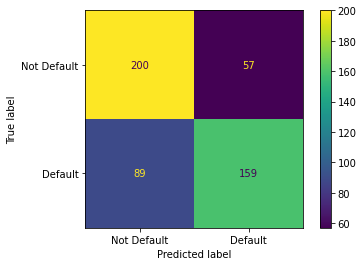

In [ ]:
plot_confusion_matrix(svc,xtscale,y_test,values_format='d',display_labels=['Not Default','Default'])

we could see from the confusion matrix out of 257 not default only 200 were corectly classified. similarly out of 248 default only 159 default are classified.So lets try to make it more optmize and efficient using cross validation GridSearchCV()

finding best value for gamma and regularization parameter'c

In [ ]:
grid_par=[{'C':[0.2,1,100,1000],'gamma':['scale',0.3,0.123,0.2345],'kernel':['rbf']},]

In [ ]:
op_par=GridSearchCV(SVC(),grid_par,cv=5,scoring='accuracy',verbose=2)
##accuracy in scoring prefers better

In [ ]:
op_par.fit(xscale,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.2, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.2, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.2, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.2, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.2, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.2, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.2, gamma=0.3, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.2, gamma=0.123, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.2, gamma=0.123

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.2, 1, 100, 1000],
                          'gamma': ['scale', 0.3, 0.123, 0.2345],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [ ]:
print(op_par.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svc1=SVC(random_state=50,C=1,gamma='scale')
svc1.fit(xscale,y_train)

SVC(C=1, random_state=50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


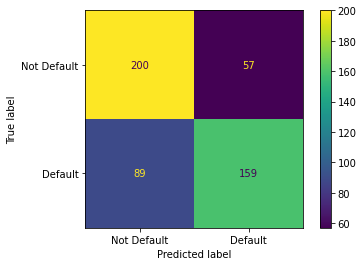

In [ ]:
plot_confusion_matrix(svc1,xtscale,y_test,display_labels=['Not Default','Default'],values_format='d')

optimization of svm didn't work out. 
the final thing to do is to draw a svm decision boundary and find  out

Here comes concept of Principal component analysis(pca) that compresses 24 columns(dimensions) into 2d graph 

In [ ]:
pca=PCA()
pca_xtrain=pca.fit_transform(xscale)

[11.9  6.3  6.   5.7  5.1  4.6  4.   3.3  3.1  2.8  2.5  2.4  2.1  2.
  1.9  1.8  1.7  1.6  1.6  1.5  1.5  1.4  1.3  1.3  1.3  1.3  1.2  1.2
  1.2  1.1  1.   1.   0.9  0.9  0.9  0.8  0.8  0.7  0.7  0.7  0.6  0.6
  0.6  0.5  0.5  0.5  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.2  0.2  0.2
  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84']


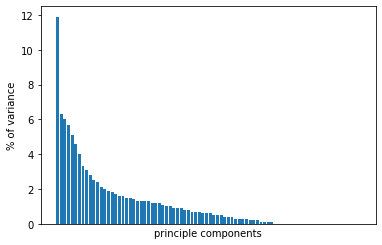

In [ ]:
variance=np.round(pca.explained_variance_ratio_*100,decimals=1)
lab=[str(i) for i in range(1,len(variance)+1)]
print(variance)
print(lab)
plt.bar(x=range(1,len(variance)+1),height=variance)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.xlabel('principle components')
plt.ylabel('% of variance')
plt.show()


pc1 contains x axis coordinates after pca similarly y axis coordinates for pc2

In [ ]:
train_pc1=pca_xtrain[:,0]
train_pc2=pca_xtrain[:,1]
## scale and center data

scaled_pca=scale(np.column_stack((train_pc1,train_pc2)))

In [ ]:
opt_par=GridSearchCV(SVC(),{'C':[1,10,100,1000,100000],'gamma':['scale',1,0.1,0.001,0.00001,0.00000001],'kernel':['rbf']},cv=5,scoring='accuracy',verbose=0)

In [ ]:
opt_par.fit(scaled_pca,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 100000],
                         'gamma': ['scale', 1, 0.1, 0.001, 1e-05, 1e-08],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
print(opt_par.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
